In [8]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import math

In [9]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [10]:
df

,MATH,PFS_P,PFS_P_CNSR,AGE,SEX,TRT01P,PDL1FL,TCGA_cluster,HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA,CD8_INVASIVE_MARGIN_SURFACE_AREA,CD8_POSITIVE_CELLS_TUMOR_CENTER,PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA,CD8_POSITIVE_CELLS_INVASIVE_MARGIN,CD8_POSITIVE_CELLS_TOTAL_AREA
X00936b9285d6b8665ae9122993fb8e91,17.928391,4.172485,0,52,F,Avelumab+Axitinib,0,m1,70.0,13.3235,0.08,0.0,0.65,0.1931
X105622fadc33f23755ac2df823110aca,16.122090,16.591376,1,78,M,Sunitinib,0,m1,85.0,NaN,0.12,1.0,NaN,0.1214
Xe44f39747a8e84b02b4cb24659312144,23.616637,11.104723,0,61,M,Sunitinib,1,m2,80.0,5.4150,0.92,5.0,0.92,0.9203
X293dd1284496215e9a0eca9f17a98e7e,24.817435,14.028747,1,55,M,Sunitinib,1,m2,60.0,NaN,3.16,5.0,NaN,3.1635
X01ed7190ce00862696edbf047b542045,19.303863,12.418891,0,68,M,Sunitinib,1,m1,80.0,12.6629,1.98,2.0,2.61,2.0708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X50772aa64efb859960b20f8801cd6f58,15.672304,4.271047,0,65,M,Sunitinib,0,m1,75.0,2.7143,1.10,1.0,2.90,1.1775
X91bcd3067a1a7954692d836515e04869,27.837848,2.496920,0,57,M,Sunitinib,1,m3,50.0,11.7334,4.03,1.0,3.65,3.9642
Xc7439a06ffa32b313b0ec1b987b992a2,26.606826,6.505133,1,43,M,Avelumab+Axitinib,0,m1,80.0,NaN,0.14,1.0,NaN,0.1417
X21a6043653d187f8bbead475d2f49791,17.627516,5.683778,1,79,M,Sunitinib,0,m3,70.0,NaN,3.10,0.0,NaN,3.1024


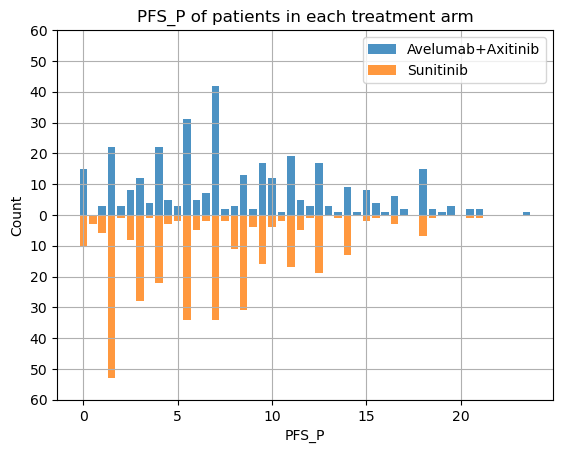

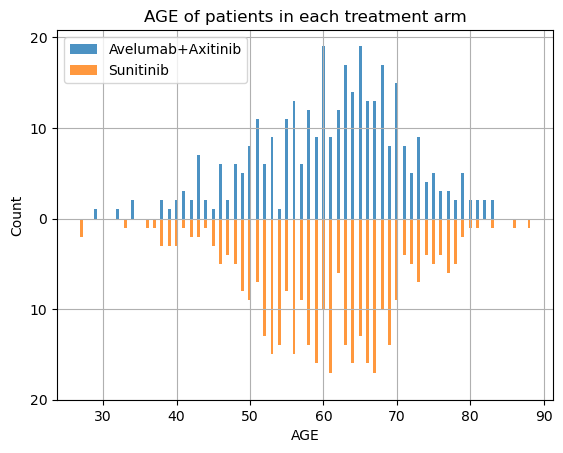

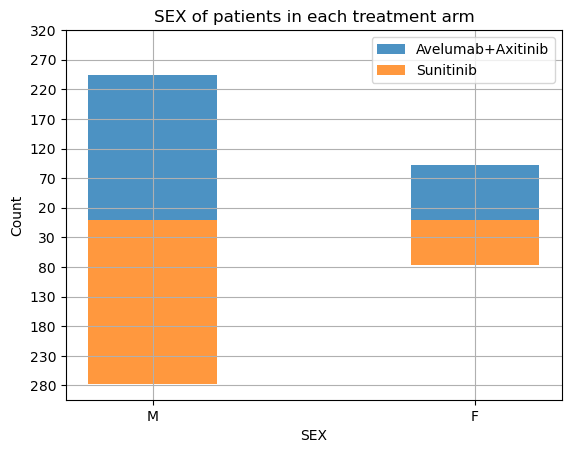

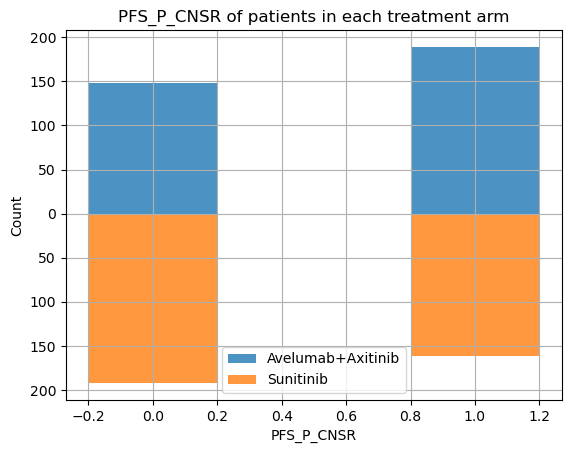

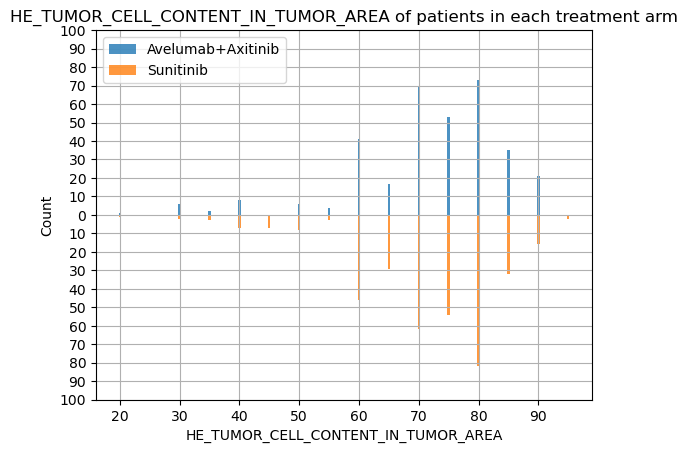

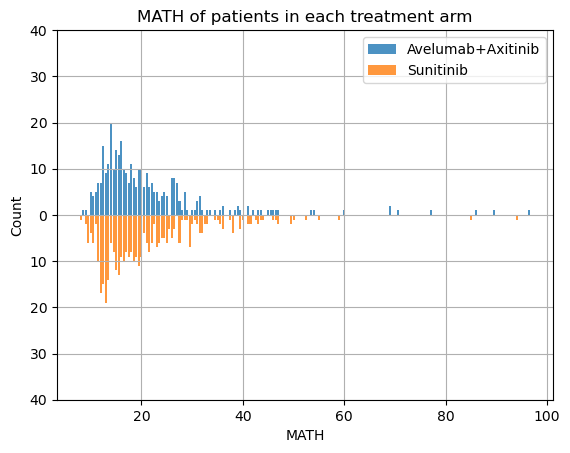

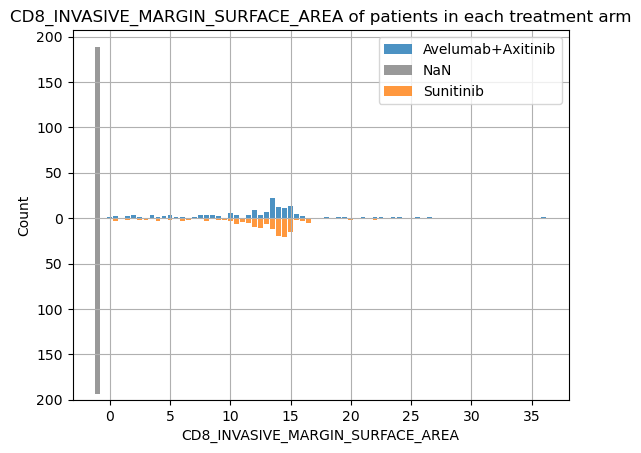

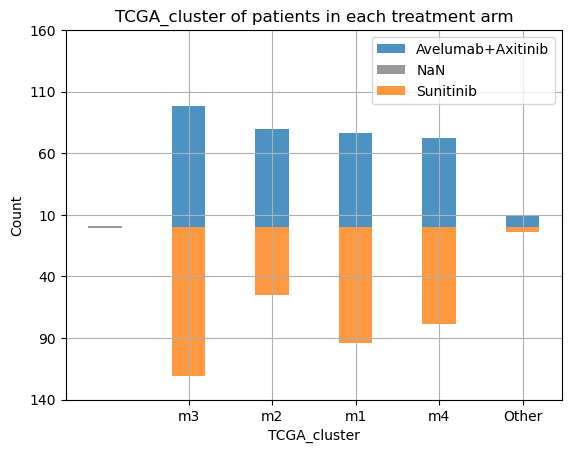

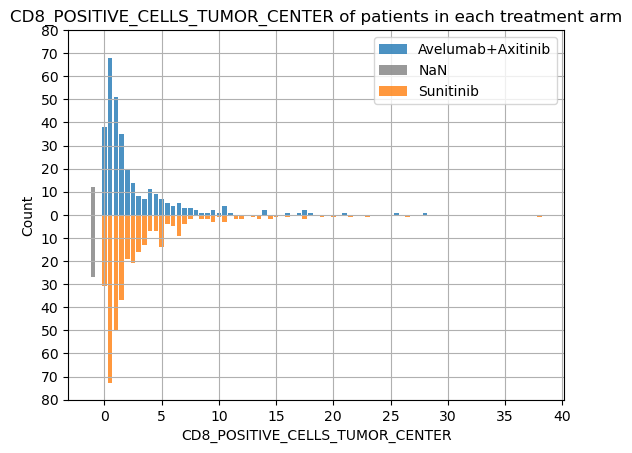

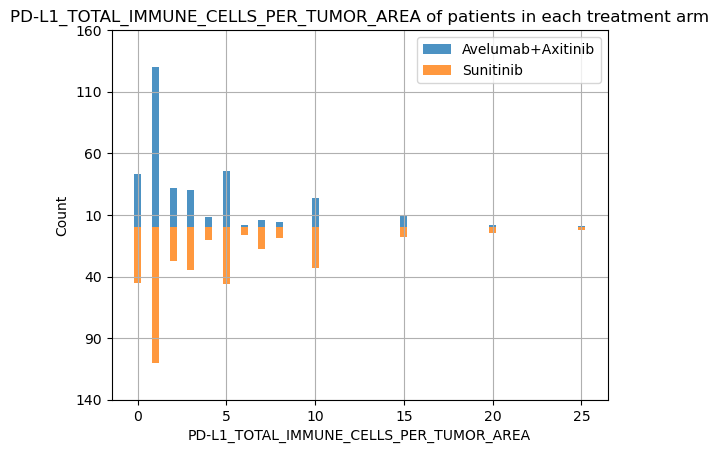

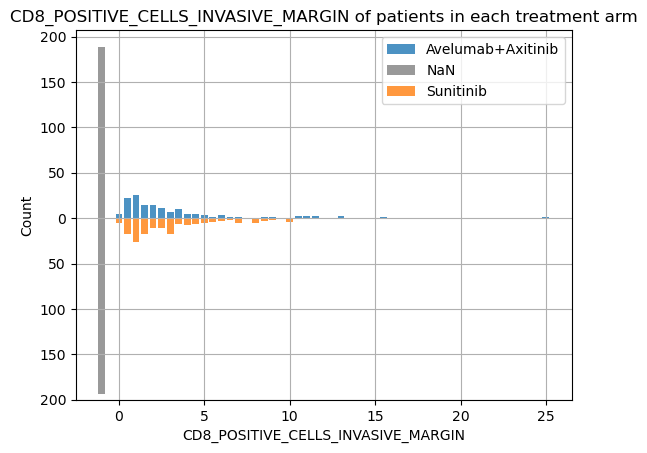

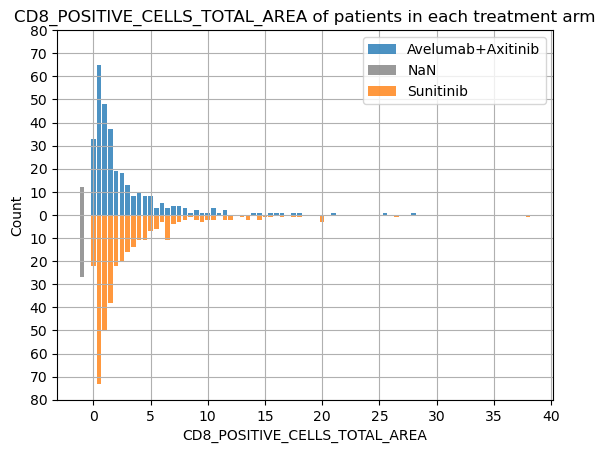

In [103]:
cohorts = [df[df['TRT01P'] == 'Avelumab+Axitinib'], 
           df[df['TRT01P'] == 'Sunitinib']]
names = ['Avelumab+Axitinib', 'Sunitinib']
biomarkers = ['PFS_P', 'AGE', 'SEX', 'PFS_P_CNSR', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA', 'MATH',
              'CD8_INVASIVE_MARGIN_SURFACE_AREA', 'TCGA_cluster', 'CD8_POSITIVE_CELLS_TUMOR_CENTER',
              'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA', 'CD8_POSITIVE_CELLS_INVASIVE_MARGIN',
              'CD8_POSITIVE_CELLS_TOTAL_AREA'
             ]

for bio in biomarkers:
    maxCount = -1
    step = 1
    for idx, cohort_df in enumerate(cohorts):
        # round(x * 2) / 2 rounds to the nearest .5 => round(2.4 * 2) / 2 = round(4.8) / 2 = 5 / 2 = 2.5
        rounded_list = None

        nan_values = cohort_df[bio].isna().sum()
        
        values = cohort_df[bio].dropna().values
        if len(set(values)) > 10:
            rounded_list = pd.array([round(x * 2) / 2 for x in values])
        else:
            rounded_list = pd.array([x for x in values])
            
        counts = rounded_list.value_counts()
        
        keys = counts.keys()
        values = counts.values


        
        if (max(max(values),nan_values) > maxCount):
            maxCount = (max(max(values),nan_values) + 20) - (max(max(values),nan_values) % 20)
            
        if idx == 1:
            values = -values
        plt.bar(keys, values, alpha = .8, width = .4, label = names[idx])
        
        # Plot gray bars for NaN values
        if nan_values > 0:
            plt.bar(-1, nan_values, alpha=.8, width=.4, color='gray', label='NaN' if idx == 0 else '', bottom=-nan_values if idx == 0 else 0)

    if (maxCount > 100):
        step = 50
    else:
        step = 10
    
    plt.yticks(np.arange(-maxCount,maxCount+(step-1),step), abs(np.arange(-maxCount,maxCount+(step-1),step)))
    plt.title(bio + " of patients in each treatment arm")
    plt.xlabel(bio)
    plt.ylabel("Count")
    plt.grid(True)
    plt.legend()
    plt.show()

In [58]:
a = df['TCGA_cluster'].fillna(-1)
a[a == -1]

X4ef84c59544ab1ec4571d9d3bc5bf20f    -1
X5662bd7ed1c9e11ee8cd047c10d281e3    -1
Name: TCGA_cluster, dtype: object

In [54]:
set(df['TCGA_cluster'])

{'Other', 'm1', 'm2', 'm3', 'm4', nan}